In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
import pandas_profiling
import statsmodels.api as sm
df = pd.read_csv("/kaggle/input/project1/Project.csv")



In [26]:
df
df[ :-1]
df.head()

,MAKE.MODEL,VOL,HP,MPG,SP,WT
0,GM/GeoMetroXF1,89,49,65.4,96,17.5
1,GM/GeoMetro,92,55,56.0,97,20.0
2,GM/GeoMetroLSI,92,55,55.9,97,20.0
3,SuzukiSwift,92,70,49.0,105,20.0
4,DaihatsuCharade,92,53,46.5,96,20.0


In [28]:
df.describe()



,VOL,HP,MPG,SP,WT
count,82.000000,82.000000,82.000000,82.000000,82.000000
mean,98.804878,117.134146,33.781707,112.414634,30.914634
std,22.166285,56.840857,10.004605,14.037825,8.141422
min,50.000000,49.000000,13.200000,90.000000,17.500000
25%,89.500000,84.000000,27.775000,105.000000,25.000000
50%,101.000000,99.000000,32.450000,109.000000,30.000000
75%,113.000000,140.000000,39.300000,114.750000,35.000000
max,160.000000,322.000000,65.400000,165.000000,55.000000


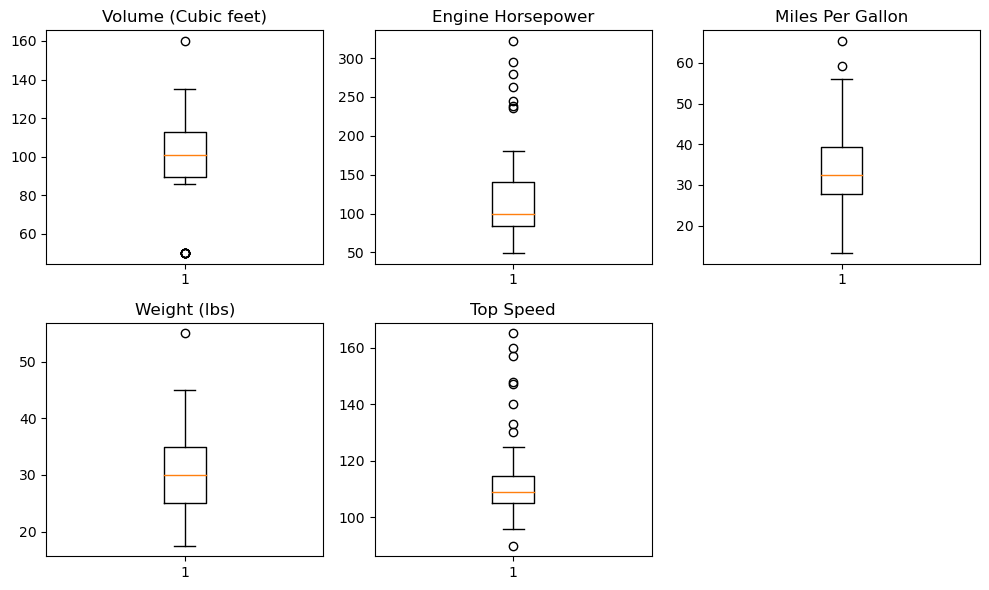

In [29]:
plt.figure(figsize=(10, 6))

plt.subplot(231)
plt.boxplot(df['VOL'])
plt.title("Volume (Cubic feet)")

plt.subplot(232)
plt.boxplot(df['HP'])
plt.title("Engine Horsepower")

plt.subplot(233)
plt.boxplot(df['MPG'])
plt.title("Miles Per Gallon")

plt.subplot(234)
plt.boxplot(df['WT'])
plt.title("Weight (lbs)")

plt.subplot(235)
plt.boxplot(df['SP'])
plt.title("Top Speed")

plt.tight_layout()
plt.show()

In [42]:
MPG = df['MPG']
VOL = df['VOL']
correlation, p_value = pearsonr(MPG, VOL)

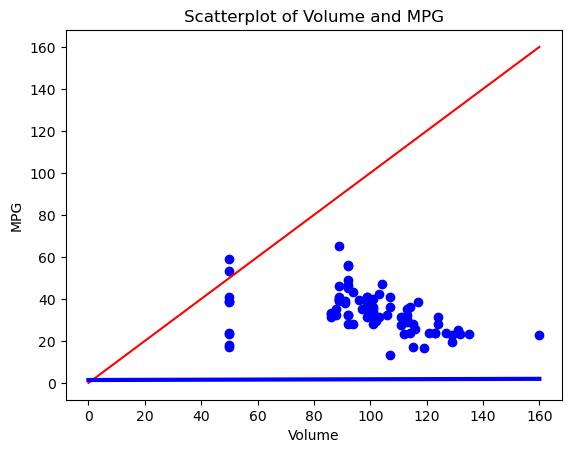

In [61]:
VOL = df['VOL']
MPG = df['MPG']
plt.scatter(VOL, MPG, marker='o', c='blue')
plt.title("Scatterplot of Volume and MPG")
plt.xlabel("Volume")
plt.ylabel("MPG")
plt.plot([0, 160], [0, 160], 'red')
plt.plot([0, 160], [np.log(4), np.log(7)], color='blue', linewidth=3)
plt.show()


In [68]:
 fit = sm.OLS.from_formula('MPG ~ VOL + HP + WT + SP', data=df).fit(); summary = fit.summary(); print(summary)

                            OLS Regression Results                            
Dep. Variable:                    MPG   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     132.7
Date:                Sat, 27 May 2023   Prob (F-statistic):           9.98e-34
Time:                        06:14:38   Log-Likelihood:                -220.00
No. Observations:                  82   AIC:                             450.0
Df Residuals:                      77   BIC:                             462.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    192.4378     23.532      8.178      0.0